In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
from sklearn.preprocessing import StandardScaler

2023-07-19 09:56:33.770874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 09:56:33.881165: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 09:56:33.883113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 09:56:35.108791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# fashion_mnist图像分类数据集   60000个样本，每个样本28*28的特征  target 0-9 对应不同衣服种类
fashion_mnist = keras.datasets.fashion_mnist
# 数据加载本地用户.keras文件中
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
# 验证集、训练集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [5]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_std = std.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_std = std.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(0.001),
              metrics=["accuracy"])

history = model.fit(x_train_std, y_train, epochs=10,
                    validation_data=(x_valid_std, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9046 - accuracy: 0.7054 - val_loss: 0.6157 - val_accuracy: 0.7938
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5852 - accuracy: 0.7976 - val_loss: 0.5215 - val_accuracy: 0.8174
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5172 - accuracy: 0.8180 - val_loss: 0.4804 - val_accuracy: 0.8326
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4795 - accuracy: 0.8314 - val_loss: 0.4509 - val_accuracy: 0.8432
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4542 - accuracy: 0.8395 - val_loss: 0.4335 - val_accuracy: 0.8520
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4351 - accuracy: 0.8457 - val_loss: 0.4197 - val_accuracy: 0.8580
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4202 - accuracy: 0.8512 - val_loss: 0.4083 - val_accuracy

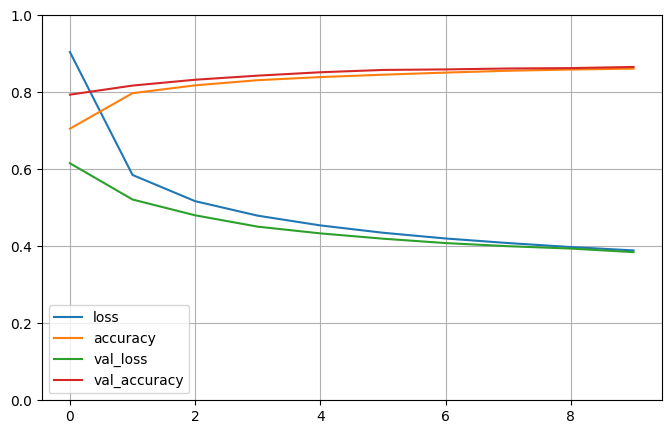

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [8]:
model.evaluate(x_test_std, y_test, verbose=0)

[0.42173340916633606, 0.8507000207901001]